In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#nltk.download('stopwords')
#nltk.download('punkt')

In [3]:
df = pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [6]:
df.shape

(12976, 28)

In [7]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [8]:
df[df['essay_set']==7]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
10684,17834,7,Patience is when your waiting .I was patience ...,8,7,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10685,17836,7,"I am not a patience person, like I cant sit i...",6,7,NaN,13,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10686,17837,7,One day I was at basketball practice and I was...,7,8,NaN,15,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10687,17838,7,I going to write about a time when I went to t...,8,9,NaN,17,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,17839,7,It can be very hard for somebody to be patient...,7,6,NaN,13,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,19558,7,One time I was getting a cool @CAPS1 game it w...,6,6,NaN,12,NaN,NaN,NaN,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12249,19559,7,A patent person in my life is my mom. Aicason ...,9,7,NaN,16,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12250,19561,7,A time when someone else I know was patient wa...,11,8,NaN,19,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12251,19562,7,I hate weddings. I love when people get marrie...,12,10,NaN,22,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dropna(axis=1,inplace=True)

In [10]:
df.shape

(12976, 6)

In [11]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [12]:
df['essay_set'].value_counts()

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: count, dtype: int64

In [13]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)
df.dropna(subset=['essay', 'domain1_score'], inplace=True)

# Exclude the 'essay' column
numeric_df = df.select_dtypes(include='number')

In [14]:
numeric_df.shape

(12976, 3)

In [15]:
numeric_df.head()

,essay_id,essay_set,domain1_score
0,1,1,8
1,2,1,9
2,3,1,7
3,4,1,10
4,5,1,8


In [16]:
min(numeric_df['domain1_score'])

0

In [17]:
max(numeric_df['domain1_score'])

60

In [18]:
numeric_df.skew()


essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
dtype: float64

In [19]:
numeric_df.kurtosis()

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

In [1]:
#Check Skewness
sns.distplot(numeric_df['domain1_score'])

NameError: name 'sns' is not defined

In [21]:
numeric_df[numeric_df['essay_set']==2]['domain1_score']

1783    4
1784    1
1785    2
1786    4
1787    4
       ..
3578    3
3579    3
3580    2
3581    3
3582    3
Name: domain1_score, Length: 1800, dtype: int64

In [22]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    #print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    #print("After Normalization : "+str(x))
    return round(x*10)

numeric_df['final_score']=numeric_df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

In [23]:
numeric_df['final_score']

0        6
1        7
2        5
3        8
4        6
        ..
12971    6
12972    5
12973    7
12974    7
12975    7
Name: final_score, Length: 12976, dtype: int64

C:\Users\NasolPC\AppData\Local\Temp\ipykernel_20152\3924945609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

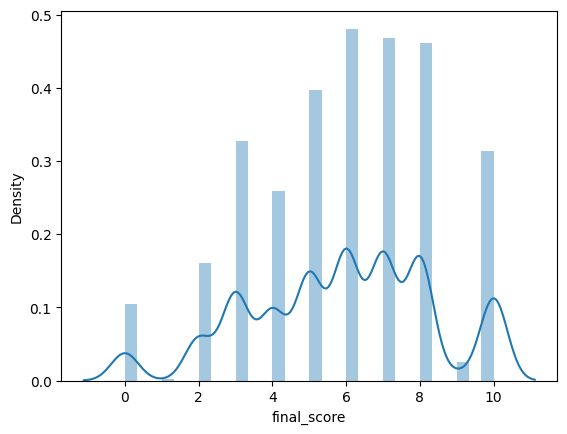

In [24]:
sns.distplot(numeric_df['final_score'])

In [25]:
numeric_df.skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
final_score     -0.248956
dtype: float64

In [26]:
numeric_df.head()

,essay_id,essay_set,domain1_score,final_score
0,1,1,8,6
1,2,1,9,7
2,3,1,7,5
3,4,1,10,8
4,5,1,8,6


In [27]:
numeric_df.describe()

,essay_id,essay_set,domain1_score,final_score
count,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,5.849877
std,6309.074105,2.136913,8.970705,2.466040
min,1.000000,1.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,4.000000
50%,10044.500000,4.000000,3.000000,6.000000
75%,15681.250000,6.000000,8.000000,8.000000
max,21633.000000,8.000000,60.000000,10.000000


In [28]:
numeric_df.drop('domain1_score',axis=1,inplace=True)

In [29]:
numeric_df.head()

,essay_id,essay_set,final_score
0,1,1,6
1,2,1,7
2,3,1,5
3,4,1,8
4,5,1,6


In [30]:
# Bring back the 'essay' column
df = pd.concat([df.drop(columns=numeric_df.columns, errors='ignore'), numeric_df], axis=1)
df.head()


,essay,domain1_score,essay_id,essay_set,final_score
0,"Dear local newspaper, I think effects computer...",8,1,1,6
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,2,1,7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,3,1,5
3,"Dear Local Newspaper, @CAPS1 I have found that...",10,4,1,8
4,"Dear @LOCATION1, I know having computers has a...",8,5,1,6


**PRE_PROCESSING**

In [31]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [32]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [33]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [34]:
df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...


In [35]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count
    
    

In [36]:
df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...


**Prep for ML**

In [37]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
data = df[['essay_set','clean_essay','final_score']].copy()
X = count_vectors.toarray()
y = data['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Machine Learning ALGO's without Pre-processing steps**

Linear Regression

In [ ]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_without_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_without_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

PermissionError: [Errno 13] Permission denied: 'Saved_Models/LR_without_pp'

Since linear regression is giving really bad results, we move on to models which do not map the features linearly like Support Vector Machines or Random Forests 

SVR

In [39]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
# pickle.dump(clf,open("d:\GitHub_repositories\pythonProject\LSTM\Automatic-Essay-Scoring\Saved_Models\SVR_without_pp",'wb'))

#Use Saved Model
# clf = pickle.load(open('d:\GitHub_repositories\pythonProject\LSTM\Automatic-Essay-Scoring\Saved_Models\SVR_without_pp', 'rb'))
# y_pred=clf.predict(X_test)
# print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

SVR(epsilon=0.2)

In [41]:
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:2.21


Random Forest

In [ ]:
#Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_without_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_without_PP', 'rb'))
predictions = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 3.68


**Machine Learning ALGO's with Pre-processing steps**

In [38]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_data.csv")

In [39]:
prep_df = pd.read_csv("Processed_data.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay,domain1_score,essay_id,essay_set,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count,noun_count,adj_count,verb_count,adv_count
0,"Dear local newspaper, I think effects computer...",8,1,1,6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,11,76,75,18,24
1,Dear I believe that using computers will benef...,9,2,1,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,21,98,84,20,19
2,"Dear, More and more people use computers, but ...",7,3,1,5,Dear More people use computers everyone agre...,1185,276,14,4.293478,5,76,51,20,16
3,"Dear Local Newspaper, I have found that many e...",10,4,1,8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,31,142,96,39,29
4,Dear I know having computers has a positive ef...,8,5,1,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,18,110,90,32,36


In [40]:
prep_df.shape

(12976, 15)

In [46]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].values, X), axis = 1)
y_full = prep_df['final_score'].values
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)


Linear Regression

In [ ]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_with_pp",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_with_pp",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 88544324431.36


SVR

In [47]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
# pickle.dump(clf,open("Saved_Models/SVR_with_pp",'wb'))

#Use Saved Model
# clf = pickle.load(open('Saved_Models/SVR_with_pp', 'rb'))
# y_pred=clf.predict(X_test)
# print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

ValueError: could not convert string to float: 'Laughter helps many situations throughout life  When angry  sad  nervous even mourning  Laughing good times old friend  realizing situation nt scary sad really quite hilarious  Many times throughout life things happened made someway another upset  people close always helped making laugh  Realizing whatever happening bad I thought  Which made look positive lighthearted side things  A specific situation happened I nine years old  In school kids time another say something hurtful without thinking  While parents teach children better seems nature make thoughtless observations  times hurting others drawing attention flaws  I sitting class working art project  There three kids group talking knows  many years ago  But boy starts talking weight tough muscular  yes eight nine years old thought cool  So turns says   CAPS shape  fat   This crushed I suppose reply  I tried act nt bother  I went finish art project  I could help hear repeating head evil words stung  My eyes started tear soon drop water appeared paper  I could hold back tears  I waiting bell ring I could get terrible place go home people smarter say things like boy  As I got bus I already feeling emotions rising surface  Starting bawl mom opened door  She exclaimed   CAPS s matter  happened   tears I relayed terrible scene  She felt bad asked boys name  I told She began laugh say  That chubby kid buck teeth   oh honey nt let bother nt shape   I started laugh realizing buck teeth  The tears stopped coming eyes I really realized whole situation  He thoughtless bragging  statement even true I fat  Laughing made feel better realize silly  Laughter really help realize nt bad  I still little embarrassed I  Laughing also got mind said  Of course even though said thoughtless comment  I would said thoughtless commend flaws  But laughing buck teeth made feel better  Laughing also made see I making big deal little situation  also '

Random Forest

In [ ]:
#Save Trained Model
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# rf.fit(X_train, y_train)
# pickle.dump(rf, open('Saved_Models/RF_with_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_wth_pp', 'rb'))
y_pred = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.88


In [ ]:
y_pred

array([5.628, 2.061, 2.635, ..., 3.053, 4.164, 2.895])